In [1]:
2+3

5


 DESCRIPTIVE STATISTICS:
                            count         mean          std       min  \
PercentLookingAtChris        55.0    58.854909    15.799338    19.180   
TotalFramesCompared          55.0  4105.763636  2176.373649  1229.000   
TimeStart                    55.0   633.235127   430.989476     9.836   
TimeEnd                      55.0  1512.610000   672.161300   386.740   
InteractionDurationSeconds   55.0   879.374182   601.134706   122.900   

                                  25%       50%        75%       max  \
PercentLookingAtChris         48.9450    62.120    70.0300    89.370   
TotalFramesCompared         1346.0000  4828.000  5076.5000  9807.000   
TimeStart                    223.7890   625.422   963.8565  1419.129   
TimeEnd                      767.7845  1903.022  2062.0675  2510.855   
InteractionDurationSeconds   134.4750  1090.840  1116.1500  2322.200   

                               range        iqr      skew  kurtosis  
PercentLookingAtChris         70

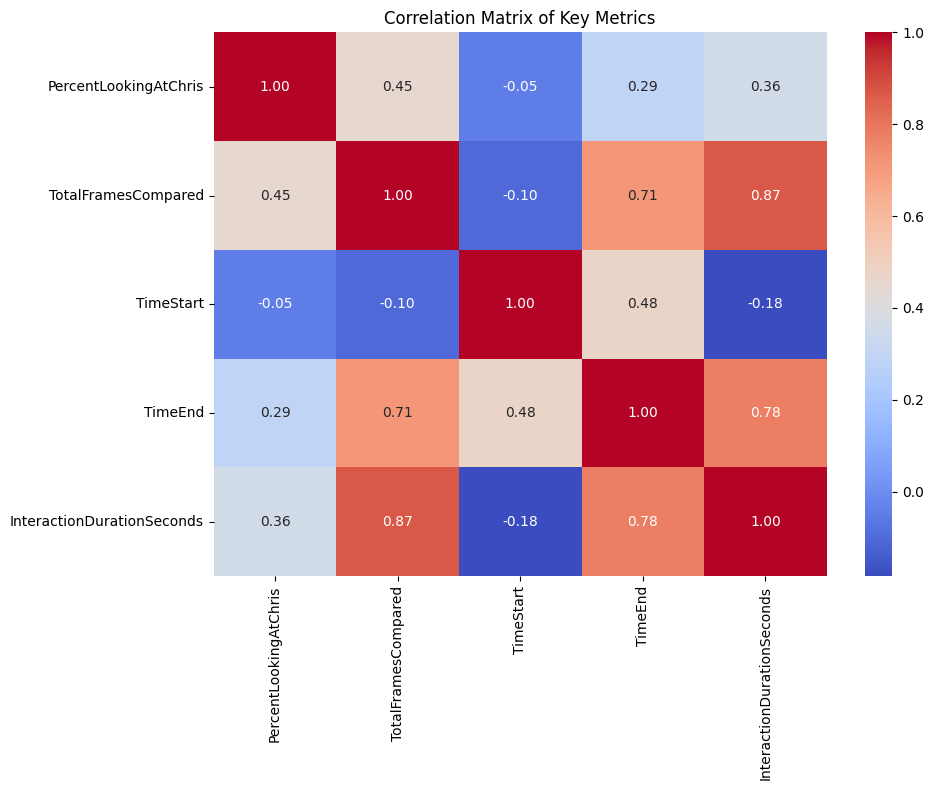

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load CSV File
file_path = r"C:\Users\bmoha\Desktop\DataCollection\gaze_engagement_plots\gaze_engagement_summary.csv"  

df = pd.read_csv(file_path)

# Step 2: Inspect and Clean Data
# Convert numeric columns
numeric_columns = ['PercentLookingAtChris', 'TotalFramesCompared', 'TimeStart', 'TimeEnd', 'InteractionDurationSeconds']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values in key numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Step 3: Descriptive Statistics
desc_stats = df[numeric_columns].describe().transpose()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['iqr'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['skew'] = df[numeric_columns].skew()
desc_stats['kurtosis'] = df[numeric_columns].kurtosis()

print("\n DESCRIPTIVE STATISTICS:")
print(desc_stats)

# Step 4: Correlation Matrix
correlation_matrix = df[numeric_columns].corr()
print("\n🔗 CORRELATION MATRIX:")
print(correlation_matrix)

# Step 5: Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Metrics")
plt.tight_layout()
plt.show()



📊 DESCRIPTIVE STATISTICS:
                            count         mean          std       min  \
PercentLookingAtChris        55.0    58.854909    15.799338    19.180   
TotalFramesCompared          55.0  4105.763636  2176.373649  1229.000   
TimeStart                    55.0   633.235127   430.989476     9.836   
TimeEnd                      55.0  1512.610000   672.161300   386.740   
InteractionDurationSeconds   55.0   879.374182   601.134706   122.900   

                                  25%       50%        75%       max  \
PercentLookingAtChris         48.9450    62.120    70.0300    89.370   
TotalFramesCompared         1346.0000  4828.000  5076.5000  9807.000   
TimeStart                    223.7890   625.422   963.8565  1419.129   
TimeEnd                      767.7845  1903.022  2062.0675  2510.855   
InteractionDurationSeconds   134.4750  1090.840  1116.1500  2322.200   

                               range        iqr      skew  kurtosis  
PercentLookingAtChris         7

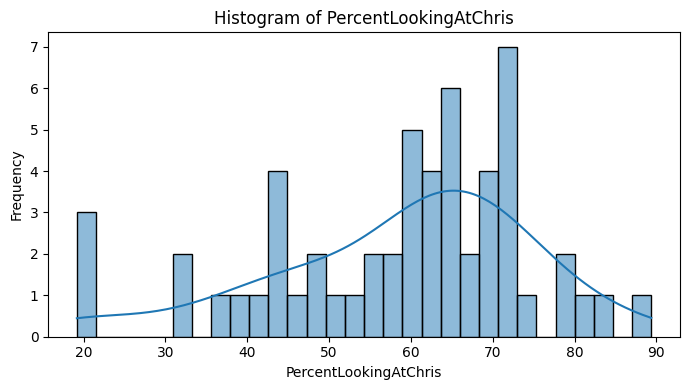

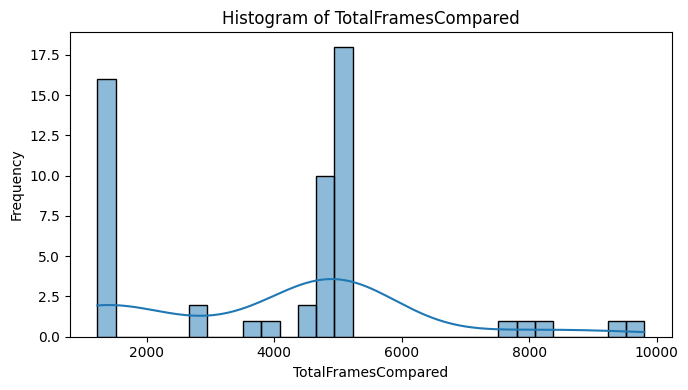

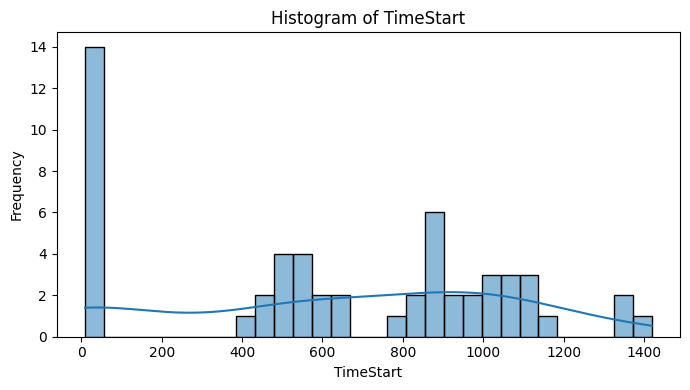

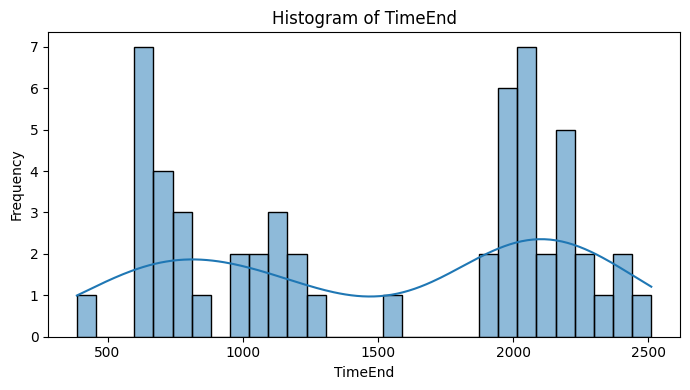

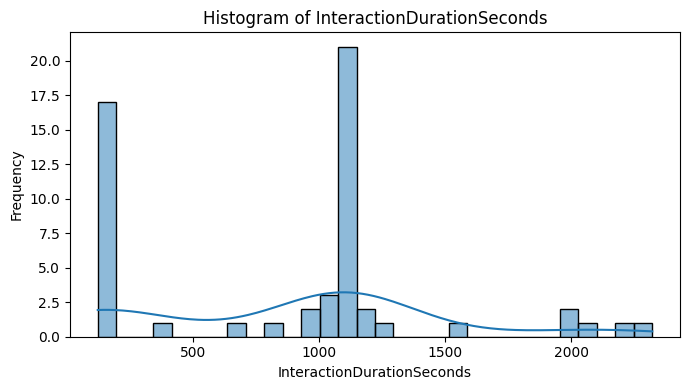

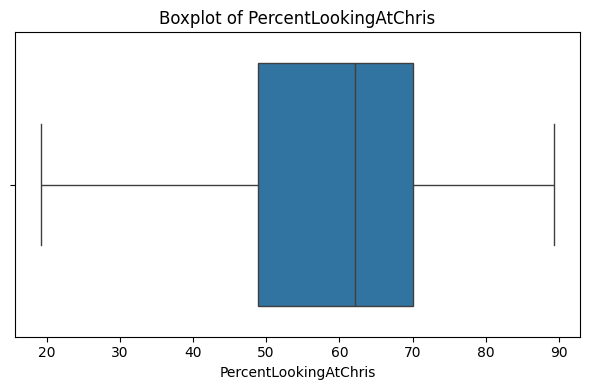

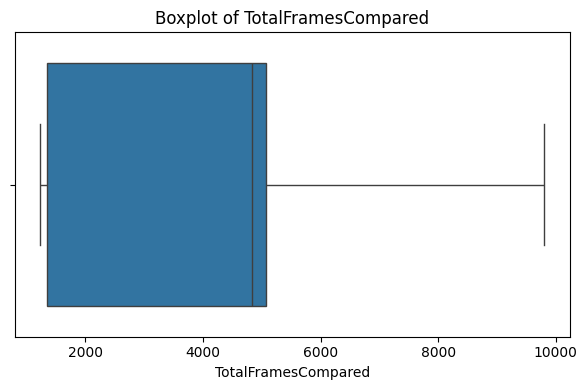

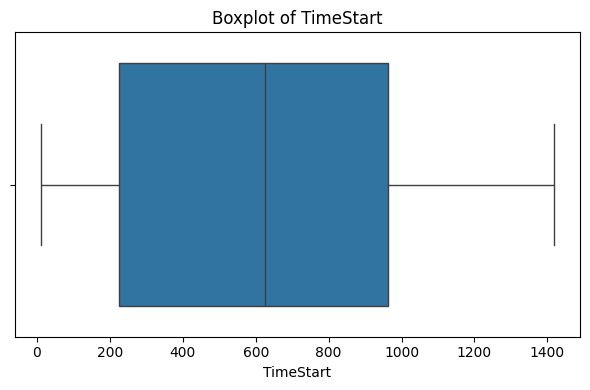

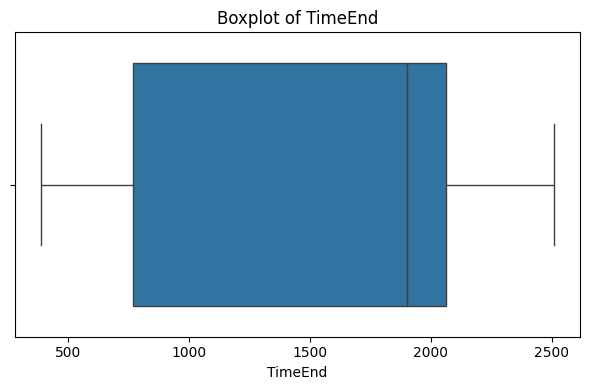

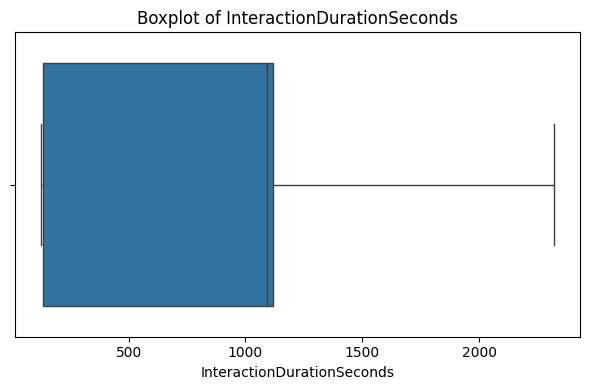

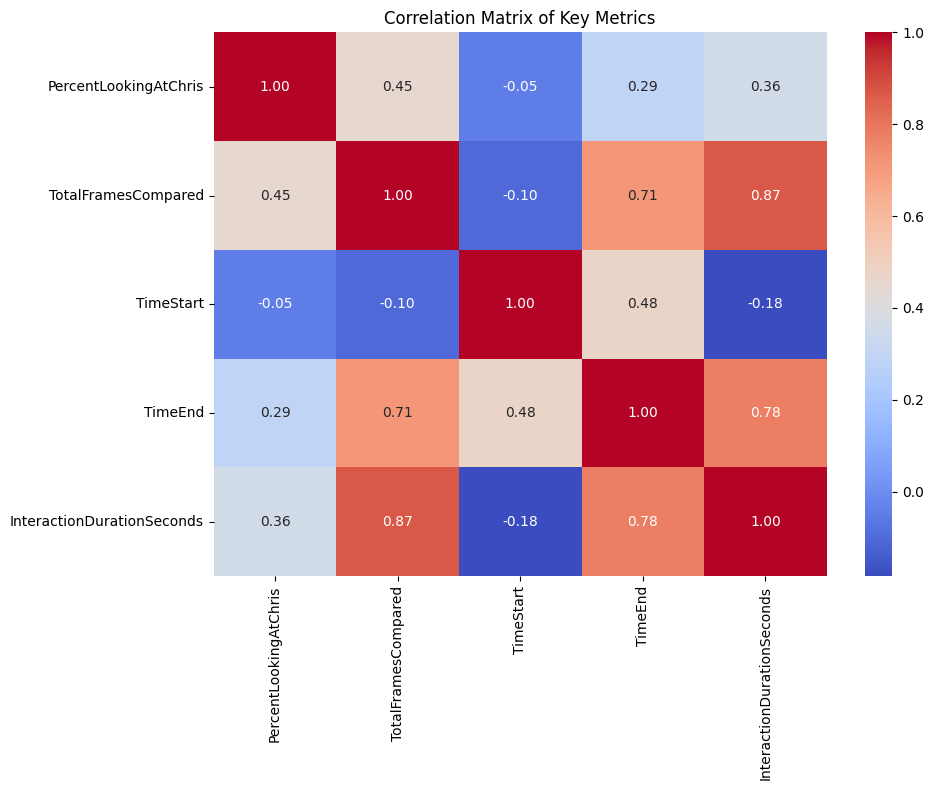

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load CSV (update your file path here)
file_path = r"C:\Users\bmoha\Desktop\DataCollection\gaze_engagement_plots\gaze_engagement_summary.csv"
df = pd.read_csv(file_path)

# Step 2: Convert key columns to numeric
numeric_columns = ['PercentLookingAtChris', 'TotalFramesCompared', 'TimeStart', 'TimeEnd', 'InteractionDurationSeconds']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=numeric_columns, inplace=True)

# Step 3: Descriptive Statistics Table
desc_stats = df[numeric_columns].describe().transpose()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['iqr'] = desc_stats['75%'] - desc_stats['25%']
desc_stats['skew'] = df[numeric_columns].skew()
desc_stats['kurtosis'] = df[numeric_columns].kurtosis()

print("\n📊 DESCRIPTIVE STATISTICS:")
print(desc_stats)

# Step 4: Histograms
for col in numeric_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Step 5: Boxplots
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Step 6: Correlation Matrix Heatmap
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Metrics")
plt.tight_layout()
plt.show()


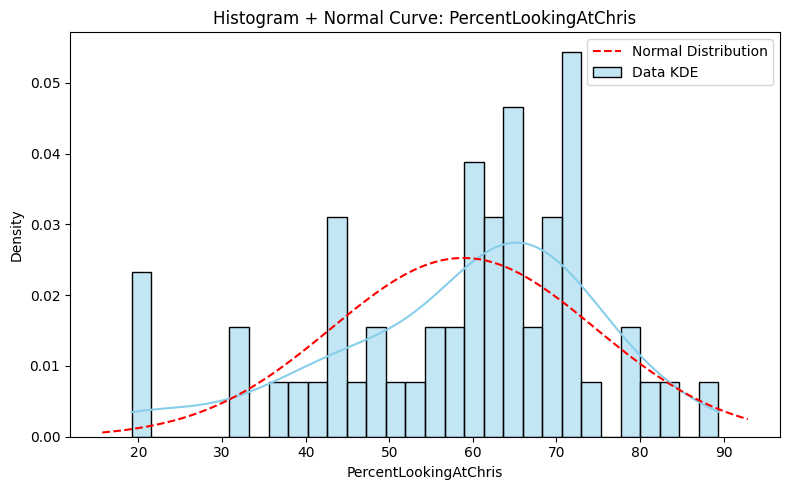

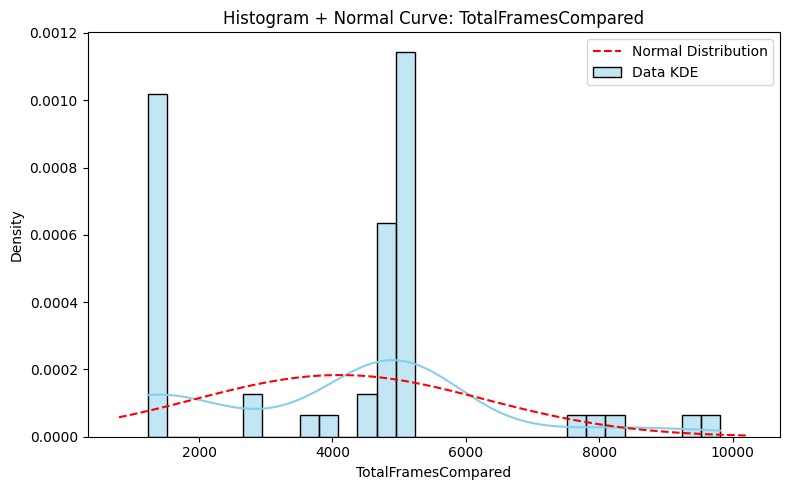

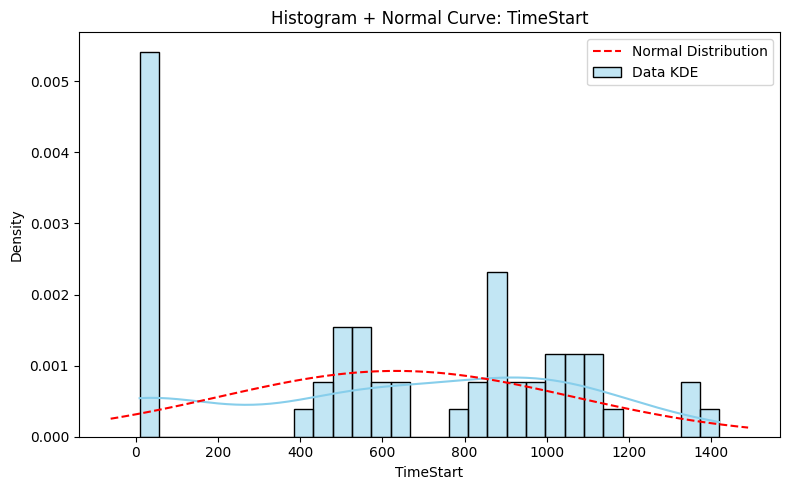

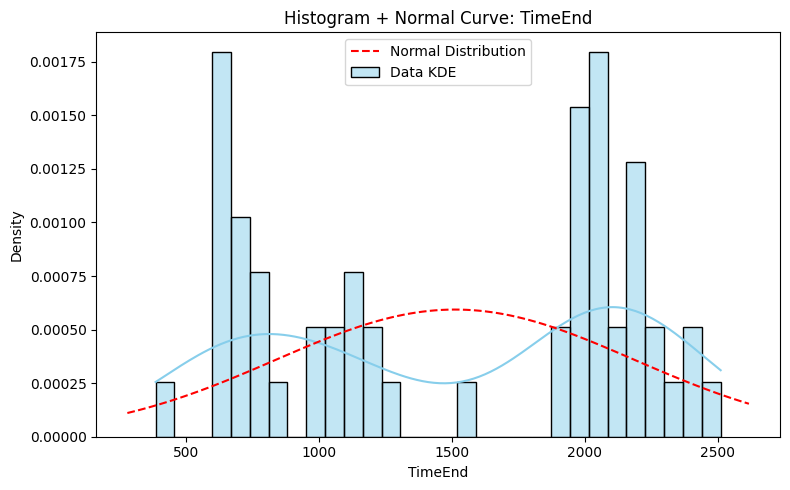

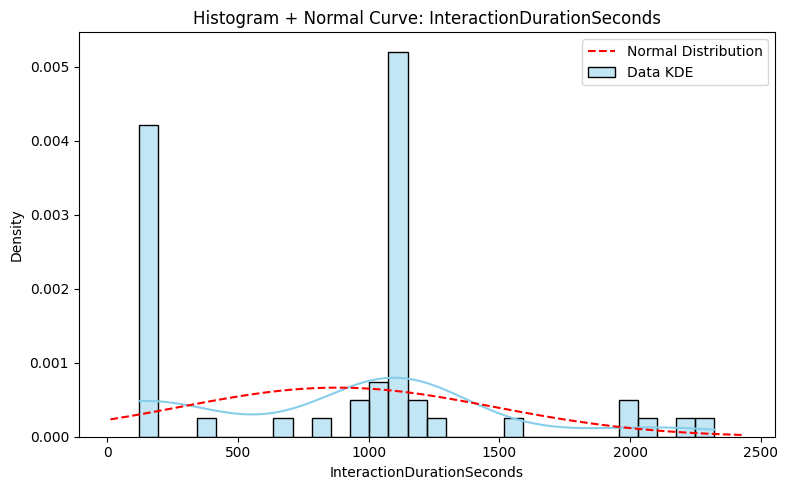

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Histograms + KDE + Normal Curve overlay
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    
    # Histogram & KDE
    sns.histplot(df[col], kde=True, bins=30, stat="density", color='skyblue', label='Data KDE')

    # Overlay normal distribution curve
    mean = df[col].mean()
    std = df[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'r--', label='Normal Distribution')

    plt.title(f"Histogram + Normal Curve: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [10]:
from scipy.stats import shapiro, kstest, anderson

# Loop through each numeric column and apply the tests
for col in numeric_columns:
    data = df[col].dropna()

    print(f"\n📈 Normality Tests for '{col}':")

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data)
    print(f"  🧪 Shapiro-Wilk Test:     Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print("     → Likely normal (p > 0.05)")
    else:
        print("     → Not normal (p ≤ 0.05)")

    # Kolmogorov-Smirnov Test (vs normal)
    ks_stat, ks_p = kstest((data - data.mean()) / data.std(), 'norm')
    print(f"  🧪 Kolmogorov-Smirnov:    Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    if ks_p > 0.05:
        print("     → Likely normal (p > 0.05)")
    else:
        print("     → Not normal (p ≤ 0.05)")

    # Anderson-Darling Test
    ad_result = anderson(data, dist='norm')
    print(f"  🧪 Anderson-Darling:      Statistic = {ad_result.statistic:.4f}")
    for i in range(len(ad_result.critical_values)):
        sig_level = ad_result.significance_level[i]
        crit_val = ad_result.critical_values[i]
        result = "PASS" if ad_result.statistic < crit_val else "FAIL"
        print(f"     → {sig_level}%: Critical Value = {crit_val:.4f}, Result = {result}")



📈 Normality Tests for 'PercentLookingAtChris':
  🧪 Shapiro-Wilk Test:     Statistic = 0.9482, p-value = 0.0192
     → Not normal (p ≤ 0.05)
  🧪 Kolmogorov-Smirnov:    Statistic = 0.1496, p-value = 0.1539
     → Likely normal (p > 0.05)
  🧪 Anderson-Darling:      Statistic = 1.0079
     → 15.0%: Critical Value = 0.5410, Result = FAIL
     → 10.0%: Critical Value = 0.6160, Result = FAIL
     → 5.0%: Critical Value = 0.7390, Result = FAIL
     → 2.5%: Critical Value = 0.8620, Result = FAIL
     → 1.0%: Critical Value = 1.0260, Result = PASS

📈 Normality Tests for 'TotalFramesCompared':
  🧪 Shapiro-Wilk Test:     Statistic = 0.8438, p-value = 0.0000
     → Not normal (p ≤ 0.05)
  🧪 Kolmogorov-Smirnov:    Statistic = 0.2165, p-value = 0.0096
     → Not normal (p ≤ 0.05)
  🧪 Anderson-Darling:      Statistic = 3.7142
     → 15.0%: Critical Value = 0.5410, Result = FAIL
     → 10.0%: Critical Value = 0.6160, Result = FAIL
     → 5.0%: Critical Value = 0.7390, Result = FAIL
     → 2.5%: Critic

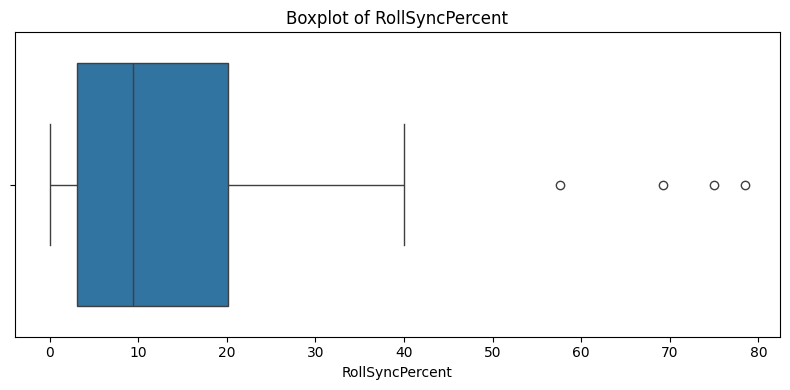

Outlier Thresholds: Lower = -22.45, Upper = 45.63

🔎 Detected Outliers in RollSyncPercent:
    Participant    BodyPart  RollSyncPercent
2          1060  WristRight            74.98
29         5985  WristRight            57.56
35         6322  WristRight            78.52
56         9383  WristRight            69.23


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\bmoha\Desktop\DataCollection\combined_synchrony_summary.csv"
df_sync = pd.read_csv(file_path)
# Assuming df_sync is your DataFrame with the columns already loaded

# 1. Boxplot to Visualize Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_sync['RollSyncPercent'])
plt.title("Boxplot of RollSyncPercent")
plt.xlabel("RollSyncPercent")
plt.tight_layout()
plt.show()

# 2. Detect Outliers using IQR Method
Q1 = df_sync['RollSyncPercent'].quantile(0.25)
Q3 = df_sync['RollSyncPercent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier Thresholds: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}")

# 3. Filter Outliers
outliers = df_sync[(df_sync['RollSyncPercent'] < lower_bound) | (df_sync['RollSyncPercent'] > upper_bound)]

print("\n🔎 Detected Outliers in RollSyncPercent:")
print(outliers[['Participant', 'BodyPart', 'RollSyncPercent']])


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\892479186.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='DTW_Distance', data=df, linewidth=2.5,


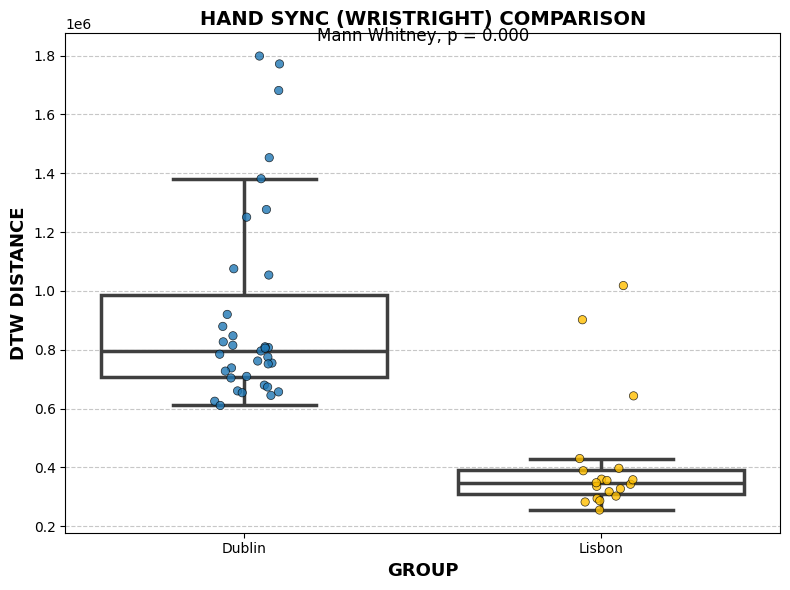

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# 🔹 Step 1: Load your CSV
# Make sure your CSV has columns: Group, DTW_Distance
df = pd.read_csv(r'C:\Users\bmoha\Desktop\DataCollection\hand_dtw_motion\wristright_dtw_summary.csv')  # <- Replace with your actual file path

# 🔹 Step 2: Mann-Whitney U Test
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# 🔹 Step 3: Visualization
plt.figure(figsize=(8, 6))

# Define custom colors for outline and points
palette = {'Dublin': '#1f77b4', 'Lisbon': '#ffbf00'}

# Draw outlined boxplots (no fill)
sns.boxplot(x='Group', y='DTW_Distance', data=df, linewidth=2.5,
            fliersize=0, palette=palette, boxprops=dict(facecolor='none'))

# Add stripplot
sns.stripplot(x='Group', y='DTW_Distance', data=df, hue='Group', dodge=False,
              palette=palette, jitter=True, size=6, alpha=0.8, marker='o', edgecolor='black', linewidth=0.5)

# 🔹 Step 4: Add p-value annotation
y_max = df['DTW_Distance'].max()
plt.text(0.5, y_max + 50000, f'Mann Whitney, p = {p_val:.3f}', ha='center', fontsize=12)

# Style the axes and plot
plt.ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
plt.xlabel('GROUP', fontsize=13, fontweight='bold')
plt.title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\397500711.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='DTW_Distance', data=df, palette=palette,


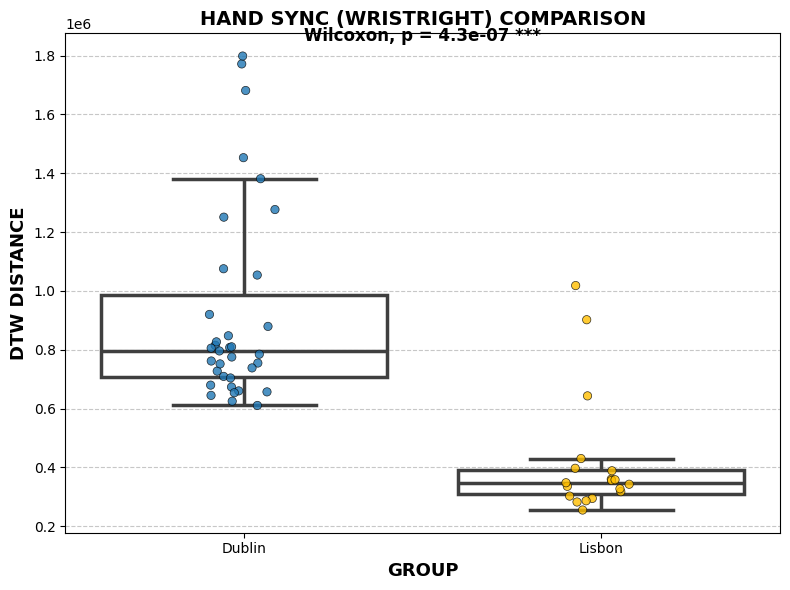

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

  # Replace with your actual CSV file path

# 🔹 Step 2: Mann-Whitney U Test
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# 🔹 Step 3: Determine significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# 🔹 Step 4: Create plot
plt.figure(figsize=(8, 6))

# Color palette for outlines
palette = {'Dublin': '#1f77b4', 'Lisbon': '#ffbf00'}

# Boxplot with colored outlines
sns.boxplot(x='Group', y='DTW_Distance', data=df, palette=palette,
            linewidth=2.5, fliersize=0, boxprops=dict(facecolor='none'))

# Overlay stripplot (data points)
sns.stripplot(x='Group', y='DTW_Distance', data=df, hue='Group',
              palette=palette, jitter=True, dodge=False,
              marker='o', edgecolor='black', linewidth=0.5, size=6, alpha=0.8)

# Annotate p-value and significance
y_max = df['DTW_Distance'].max()
plt.text(0.5, y_max + 50000, f'Wilcoxon, p = {p_val:.1e} {stars}',
         ha='center', fontsize=12, fontweight='bold')

# 🔹 Styling
plt.ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
plt.xlabel('GROUP', fontsize=13, fontweight='bold')
plt.title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\2553546984.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='DTW_Distance', data=df,


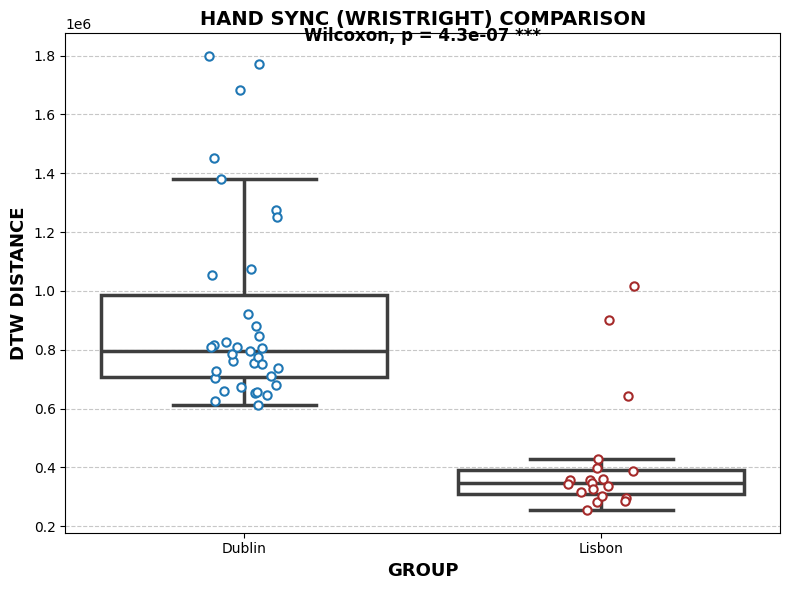

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load CSV
#df = pd.read_csv('your_dtw_data.csv')  # Replace with your actual file path

# Mann-Whitney U Test
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# Significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# Define custom outline colors
outline_colors = {'Dublin': '#1f77b4', 'Lisbon': '#a52a2a'}  # Blue and Brown

# Begin plot
plt.figure(figsize=(8, 6))

# Boxplot with no fill, group-specific outlines
sns.boxplot(x='Group', y='DTW_Distance', data=df,
            linewidth=2.5, fliersize=0,
            palette=[outline_colors['Dublin'], outline_colors['Lisbon']],
            boxprops=dict(facecolor='none'))

# Stripplot with group-colored outlines
for group in df['Group'].unique():
    sns.stripplot(data=df[df['Group'] == group], x='Group', y='DTW_Distance',
                  color='white', edgecolor=outline_colors[group], linewidth=1.5,
                  size=6, jitter=True)

# P-value annotation
y_max = df['DTW_Distance'].max()
plt.text(0.5, y_max + 50000, f'Wilcoxon, p = {p_val:.1e} {stars}',
         ha='center', fontsize=12, fontweight='bold')

# Style settings
plt.ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
plt.xlabel('GROUP', fontsize=13, fontweight='bold')
plt.title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


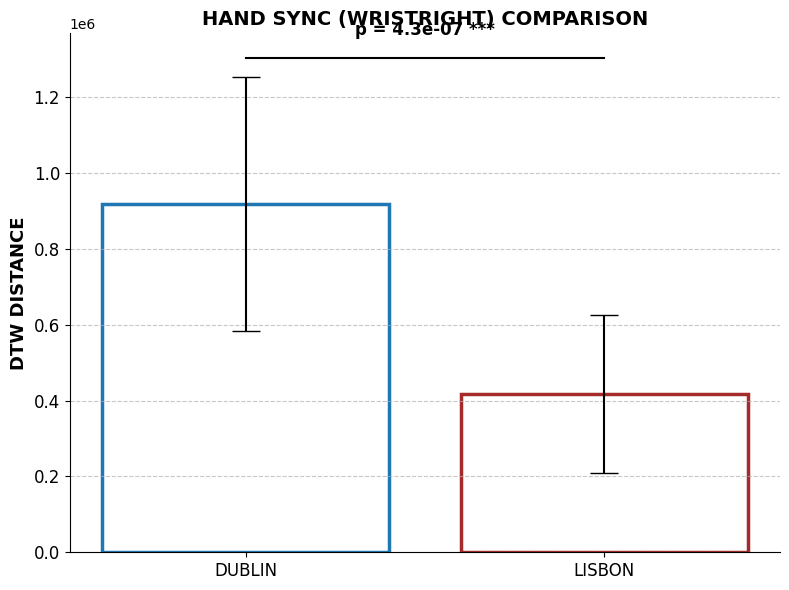

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load your CSV
#df = pd.read_csv('your_dtw_data.csv')  # Replace with your file path

# Separate data
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']

# Mann-Whitney U Test
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# Significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# Means and standard deviations
means = [dublin.mean(), lisbon.mean()]
stds = [dublin.std(), lisbon.std()]
labels = ['DUBLIN', 'LISBON']
outline_colors = ['#1f77b4', '#a52a2a']  # Blue and Brown

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, means, yerr=stds, capsize=10, color='white', edgecolor=outline_colors, linewidth=2.5)

# Annotate p-value and significance
y_max = max(means[0] + stds[0], means[1] + stds[1])
ax.plot([0, 1], [y_max + 50000] * 2, color='black', linewidth=1.5)
ax.text(0.5, y_max + 100000, f'p = {p_val:.1e} {stars}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and styling
ax.set_ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
ax.set_title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\3021196164.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='DTW_Distance', data=df, ax=ax,


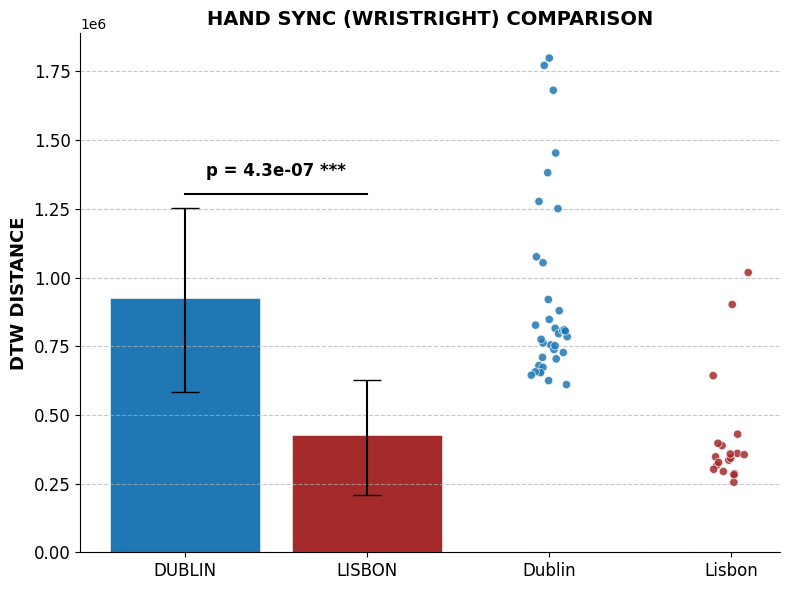

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load your data
#df = pd.read_csv('your_dtw_data.csv')  # Replace with your path

# Separate groups
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']

# Mann-Whitney U test
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# Significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# Group summary
means = [dublin.mean(), lisbon.mean()]
stds = [dublin.std(), lisbon.std()]
labels = ['DUBLIN', 'LISBON']
colors = ['#1f77b4', '#a52a2a']  # Blue and Brown

# Begin plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot
bars = ax.bar(labels, means, yerr=stds, capsize=10, color=colors, edgecolor=colors, linewidth=2.5)

# Add individual data points (strip-style)
sns.stripplot(x='Group', y='DTW_Distance', data=df, ax=ax,
              jitter=True, size=6, palette=colors, edgecolor='white', linewidth=0.5, alpha=0.85)

# Annotate p-value
y_max = max(means[0] + stds[0], means[1] + stds[1])
ax.plot([0, 1], [y_max + 50000] * 2, color='black', linewidth=1.5)
ax.text(0.5, y_max + 100000, f'p = {p_val:.1e} {stars}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Styling
ax.set_ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
ax.set_title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
ax.set_xlabel('')
ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend([], [], frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\3944595364.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='DTW_Distance', data=df,


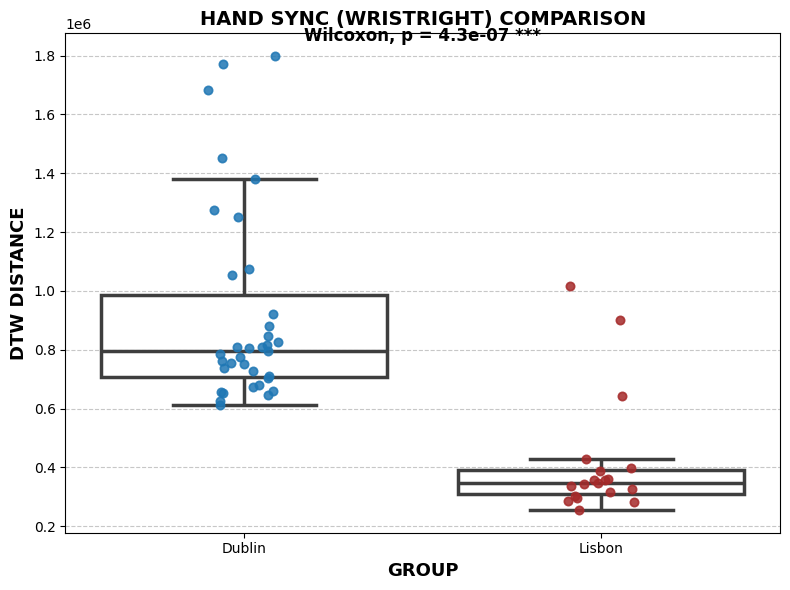

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load your data
#df = pd.read_csv('your_dtw_data.csv')  # Replace with your actual file path

# Mann-Whitney U test
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# Determine significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# Define custom outline and dot colors
box_colors = {'Dublin': '#1f77b4', 'Lisbon': '#a52a2a'}  # blue & brown

plt.figure(figsize=(8, 6))

# Draw boxplot with no fill, custom outline
sns.boxplot(x='Group', y='DTW_Distance', data=df,
            palette=box_colors,
            linewidth=2.5, fliersize=0,
            boxprops=dict(facecolor='none'))

# Overlay matching color dots
for group in df['Group'].unique():
    sns.stripplot(data=df[df['Group'] == group], x='Group', y='DTW_Distance',
                  color=box_colors[group], edgecolor=box_colors[group],
                  linewidth=1.2, size=6, jitter=True, alpha=0.85)

# Add p-value annotation
y_max = df['DTW_Distance'].max()
plt.text(0.5, y_max + 50000, f'Wilcoxon, p = {p_val:.1e} {stars}',
         ha='center', fontsize=12, fontweight='bold')

# Final touches
plt.ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
plt.xlabel('GROUP', fontsize=13, fontweight='bold')
plt.title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\3632635449.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='DTW_Distance', data=df,
C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\3632635449.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Group', y='DTW_Distance', data=df,


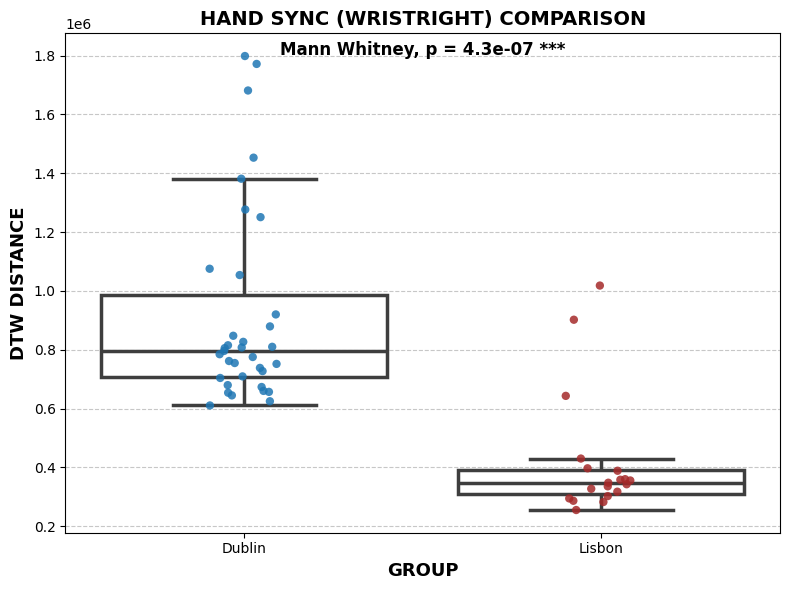

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load your data
#df = pd.read_csv('your_dtw_data.csv')  # Replace with your actual file path

# Mann-Whitney U test
dublin = df[df['Group'] == 'Dublin']['DTW_Distance']
lisbon = df[df['Group'] == 'Lisbon']['DTW_Distance']
stat, p_val = mannwhitneyu(dublin, lisbon, alternative='two-sided')

# Determine significance stars
if p_val <= 0.001:
    stars = '***'
elif p_val <= 0.01:
    stars = '**'
elif p_val <= 0.05:
    stars = '*'
else:
    stars = 'ns'

# Define custom outline and dot colors
box_colors = {'Dublin': '#1f77b4', 'Lisbon': '#a52a2a'}  # blue & brown

plt.figure(figsize=(8, 6))

# Draw boxplot with no fill, custom outlines
sns.boxplot(x='Group', y='DTW_Distance', data=df,
            palette=box_colors,
            linewidth=2.5, fliersize=0,
            boxprops=dict(facecolor='none')) 

# Stripplot INSIDE box with matching outline and fill
sns.stripplot(x='Group', y='DTW_Distance', data=df,
              palette=box_colors, edgecolor=None, linewidth=0,
              size=6, jitter=True, alpha=0.85, dodge=False)

# Add p-value annotation
y_max = df['DTW_Distance'].max()
plt.text(0.5, y_max + 2000, f'Mann Whitney, p = {p_val:.1e} {stars}',
         ha='center', fontsize=12, fontweight='bold')

# Final touches
plt.ylabel('DTW DISTANCE', fontsize=13, fontweight='bold')
plt.xlabel('GROUP', fontsize=13, fontweight='bold')
plt.title('HAND SYNC (WRISTRIGHT) COMPARISON', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


In [15]:
2+3

5

C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\2281034432.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Group', y=y_col, palette=color_map,


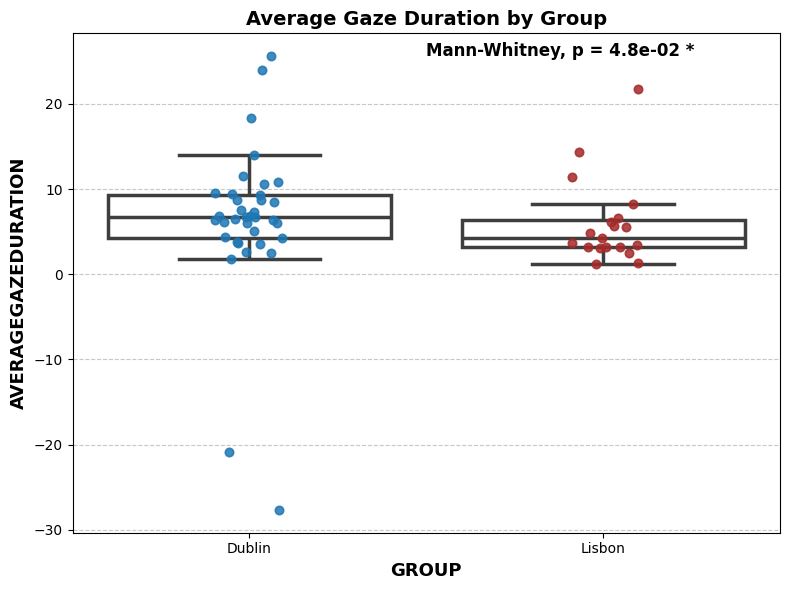

C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\2281034432.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Group', y=y_col, palette=color_map,


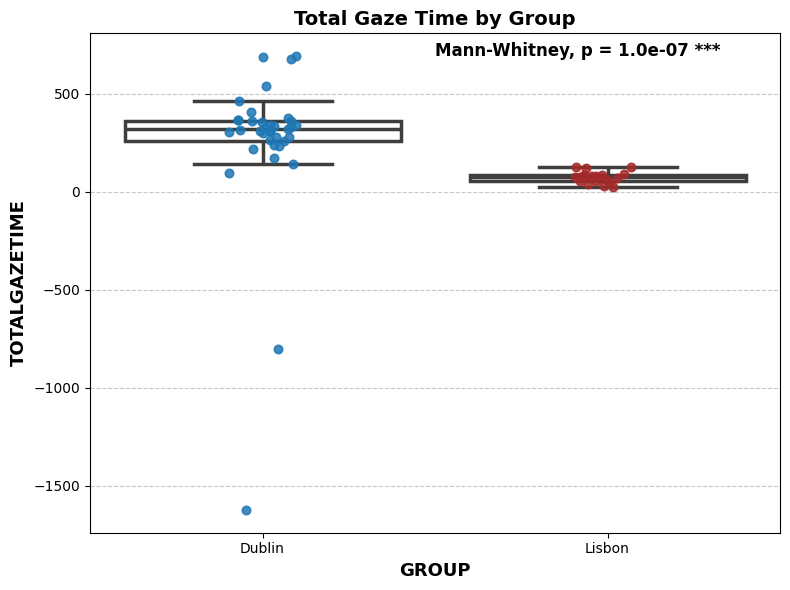

C:\Users\bmoha\AppData\Local\Temp\ipykernel_7736\2281034432.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Group', y=y_col, palette=color_map,


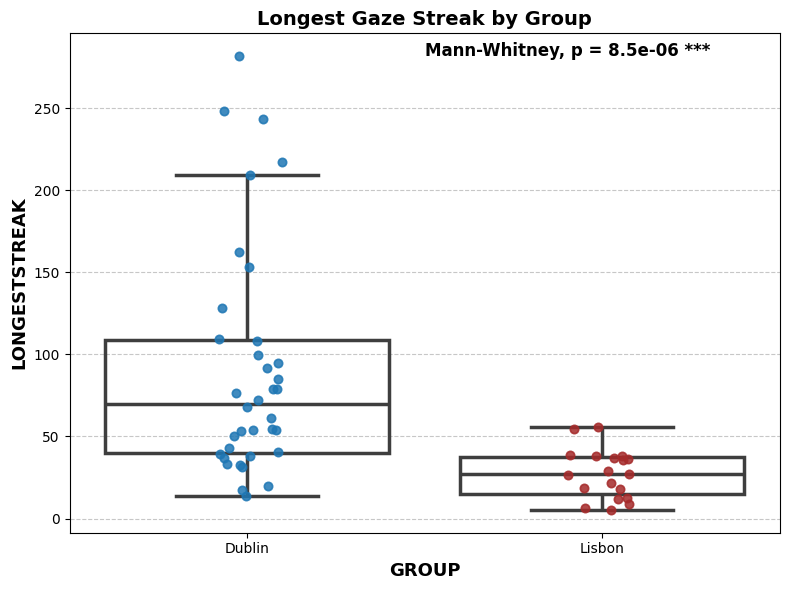

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load your summary CSV
df_summary = pd.read_csv(r'C:\Users\bmoha\Desktop\DataCollection\gaze_engagement_streaks\gaze_streaks_summary.csv')  # Change to your actual path

# Step 1: Auto-assign Dublin/Lisbon based on Participant order
cut_index = df_summary[df_summary['Participant'] == 9296].index[0]
df_summary['Group'] = 'Dublin'
df_summary.loc[cut_index + 1:, 'Group'] = 'Lisbon'

# Step 2: Define function to create plot + test
def plot_with_stats(data, y_col, title, color_map):
    plt.figure(figsize=(8, 6))
    
    # Boxplot with colored outlines
    sns.boxplot(data=data, x='Group', y=y_col, palette=color_map,
                linewidth=2.5, fliersize=0, boxprops=dict(facecolor='none'))
    
    # Overlay matching colored dots
    for group in data['Group'].unique():
        sns.stripplot(data=data[data['Group'] == group], x='Group', y=y_col,
                      color=color_map[group], edgecolor=color_map[group],
                      linewidth=1.2, size=6, jitter=True, alpha=0.85)
    #sns.violinplot(x='Group', y='AverageGazeDuration', data=df_summary, palette=colors)
    #sns.boxplot(x='Group', y='TotalGazeTime', data=df_summary, palette=colors, showfliers=False)
    #sns.swarmplot(x='Group', y='TotalGazeTime', data=df_summary, color='k', size=5)
    #sns.kdeplot(data=df_summary, x='AverageGazeDuration', hue='Group', fill=True, common_norm=False)


    # Mann-Whitney U test
    group1 = data[data['Group'] == 'Dublin'][y_col]
    group2 = data[data['Group'] == 'Lisbon'][y_col]
    stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')

    # Significance stars
    if p_val <= 0.001:
        stars = '***'
    elif p_val <= 0.01:
        stars = '**'
    elif p_val <= 0.05:
        stars = '*'
    else:
        stars = 'ns'

    y_max = data[y_col].max()
   # plt.text(0.5, y_max + 0.05 * y_max, f'Mann-Whitney, p = {p_val:.1e} {stars}',
            # ha='center', fontsize=12, fontweight='bold')
    plt.text(0.50, y_max + 0.0 * y_max, f'Mann-Whitney, p = {p_val:.1e} {stars}',
         ha='left', fontsize=12, fontweight='bold')


    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('GROUP', fontsize=13, fontweight='bold')
    plt.ylabel(y_col.upper(), fontsize=13, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    


# Step 3: Define colors and call plotting function
colors = {'Dublin': '#1f77b4', 'Lisbon': '#a52a2a'}

plot_with_stats(df_summary, 'AverageGazeDuration', 'Average Gaze Duration by Group', colors)
plot_with_stats(df_summary, 'TotalGazeTime', 'Total Gaze Time by Group', colors)
plot_with_stats(df_summary, 'LongestStreak', 'Longest Gaze Streak by Group', colors)
